In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# File to Load
housing_data_to_load = "Housing prices for US.csv"
index_data_to_load = "SPX_Prices_30yr_SPXFirstOfMonth.csv"

# Read the files
housing_data = pd.read_csv(housing_data_to_load)
index_data = pd.read_csv(index_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(index_data, housing_data, on="DATE")

combined_data.head()

,Ticker,DATE,PX_LAST,PX_VOLUME,Sector,MSPUS
0,SPX Index ...,1/1/1984,164.93,NaN,All,78200
1,SPX Index ...,4/1/1984,159.18,NaN,All,80700
2,SPX Index ...,7/1/1984,153.18,NaN,All,81000
3,SPX Index ...,10/1/1984,166.10,NaN,All,79900
4,SPX Index ...,1/1/1985,167.24,NaN,All,82800


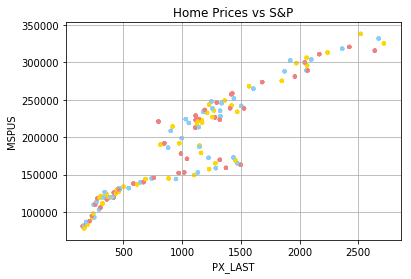

In [6]:
# Scatter plot, similar to matplotlib homeworks
# Obtain the x and y coordinates
x="PX_LAST"
y="MSPUS"
mycolors = ["gold", "lightskyblue", "lightcoral"]

fig, ax = plt.subplots()

for i, (Sector) in enumerate(combined_data):
    combined_data.plot.scatter(x, y, s=10, color=mycolors, grid=True, ax=ax, title="Home Prices vs S&P")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

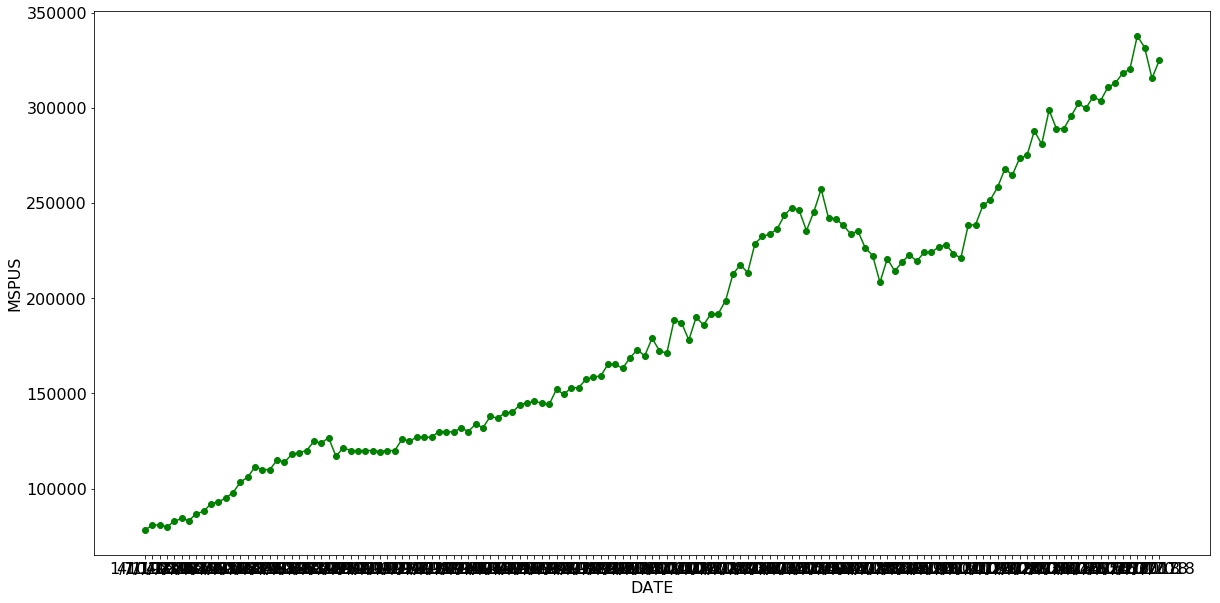

In [11]:
# plot graph of housing prices

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("DATE")
ax1.set_ylabel(y)

data1 = combined_data["MSPUS"]
x_axis1 = combined_data["DATE"]

cost_trend = plt.plot(x_axis1,data1,color='g',marker = "o")

plt.show


In [12]:
#plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(0, 1000)
#plt.xlim(0, 350000)

#plt.title("Home Prices vs S&P 500")
#plt.xlabel("Average Home Prices")
#plt.ylabel("DATE")

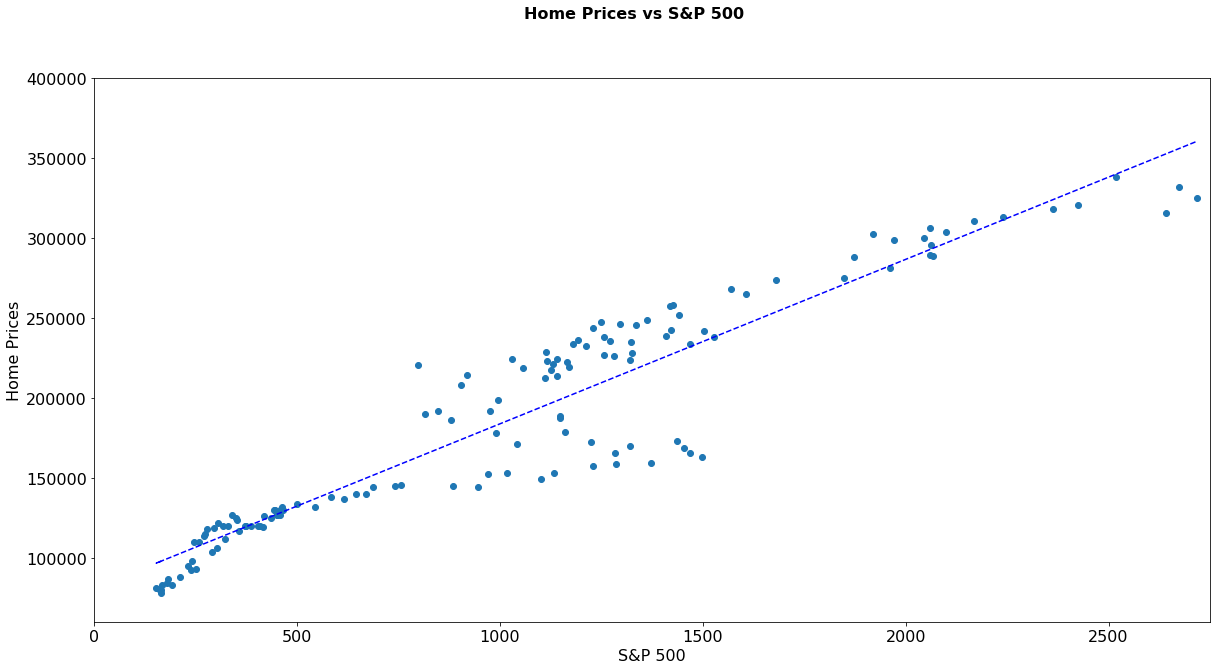

In [31]:
# 05-Matplotlib/Classwork/3/Activities/09-Ins_Fits_and_Regression/Solved

# Set data
x_axis = combined_data["PX_LAST"]
y_axis = combined_data["MSPUS"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs S&P 500", fontsize=16, fontweight="bold")

ax.set_xlim(0, 2750)
ax.set_ylim(60000, 400000)

ax.set_xlabel("S&P 500")
ax.set_ylabel("Home Prices")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()